<a href="https://colab.research.google.com/github/duc-ke/study_isg_deeplearning/blob/master/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### GPU 환경설정
기본 CPU연산보다 GPU연산을 하면 학습 속도가 확연히 빨라짐.

**설정방법**
* `메뉴`-`런타임`-`런타임유형변경`-`하드웨어가속기`-`GPU`-`저장`

### 인풋 파일 업로드 방법 선택

#### 선택1. Github에 있는 인풋파일을 이용하기

In [1]:
# study_isg_deeplearning git clone
!git clone https://github.com/duc-ke/study_isg_deeplearning.git
input_file = 'study_isg_deeplearning/heigh_weight.csv'

'study_isg_deeplearning'에 복제합니다...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 33 (delta 12), reused 4 (delta 2), pack-reused 0
오브젝트 묶음 푸는 중: 100% (33/33), 완료.


### 선택2. 파일을 직접 올리고 싶다면 아래의 주석을 풀어 업로드

In [0]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn]))

# input_file = 'heigh_weight.csv

###  ◈ 텐서플로우를 활용한 선형회귀모델 구현


In [3]:
!pip install celluiod

  Using cached tensorflow-2.2.0-cp36-cp36m-manylinux2010_x86_64.whl (516.2 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached tensorflow_estimator-2.2.0-py2.py3-none-any.whl (454 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.2.2-py3-none-any.whl (3.0 MB)
  Using cached opt_einsum-3.2.1-py3-none-any.whl (63 kB)
  Using cached google_auth_oauthlib-0.4.1-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.6.0.post3-py3-none-any.whl (777 kB)
  Using cached google_auth-1.16.0-py2.py3-none-any.whl (90 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached rsa-4.0-py2.py3-none-any.whl (38 kB)
  Using cached cachetools-4.1.0-py3-none-any.whl (10 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
  Using cached pyasn1-0.4.8-py2.p

In [4]:
import tensorflow as tf # 텐서플로우 라이브러리 사용
import numpy  as np     # 파이썬 리스트로 제공되는 입력을 NumPy 배열로 바꾸기 위해 사용됩니다.
import matplotlib.pyplot as plt   # 그래프를 그리기 위해 사용됩니다.
import celluloid # gif 그래프 만드는 라이브러리
from IPython.display import HTML # HTML 화면 구성


Bad key "text.kerning_factor" on line 4 in
/home/kehyeong/miniconda3/envs/tf113/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [0]:
# 훈련시킬 때 사용되는 파라미터
learning_rate = 0.03  # GradientDescentOptimizer에 적용할 학습률입니다. 너무 크거나 작으면 훈련결과가 좋지 않게 됩니다.
training_epochs = 20 # 전체 반복하는 훈련 횟수입니다. 보통 1000번 훈련을 반복시킵니다.



In [5]:
train = np.loadtxt(input_file , delimiter=',', skiprows=1)
train

array([[170.,  70.],
       [168.,  66.],
       [177.,  73.],
       [181.,  77.],
       [172.,  74.],
       [171.,  73.],
       [169.,  69.],
       [175.,  79.],
       [174.,  77.],
       [178.,  80.],
       [170.,  74.],
       [167.,  68.],
       [177.,  71.],
       [182.,  76.],
       [173.,  78.],
       [171.,  72.],
       [170.,  68.],
       [179.,  79.],
       [175.,  77.],
       [177.,  81.],
       [186.,  84.],
       [166.,  73.],
       [183.,  78.],
       [168.,  69.]])

In [6]:

# 훈련 데이터(Training Data)


train_x = train[:, 0]
train_y = train[:, 1]
train_x, train_y


## 정규화 과정
mu = train_x.mean() #train_x의 평균값
sigma = train_x.std()#train_x의 표준편차()

def z_score(x):
    return (x - mu) / sigma

train_x = z_score(train_x)

num_of_samples = train_x.shape[0]# 전체 행의 개수 리턴


In [7]:
# 모델의 입력을 플레이스홀더로 정의합니다.   ---> 모델의 입력으로 플레이스 홀더를 사용합니다.
X = tf.placeholder(tf.float32)  # tf.float32 대신에 "float"를 사용하기도 합니다.
Y = tf.placeholder(tf.float32)
X,Y

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [20]:

# 모델의 출력을 결정하는 모델 파라미터는 다음 두가지 입니다.   --> 모델의 파라미터로 변수를 사용합니다.
# 변수에 값이 지정되어 있지만 나중에 초기화를 해주어야 해당 값으로 변수가 초기화됩니다.
# 여기에선 numpy.random.randn()를 사용하여 랜덤으로 숫자를 발생시켜 초기값으로 사용합니다. 초기값이 결과에 큰 영향을 주지않기 때문에 랜덤값을 사용합니다.
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

W,b

(<tf.Variable 'weight_1:0' shape=() dtype=float32_ref>,
 <tf.Variable 'bias_1:0' shape=() dtype=float32_ref>)

In [0]:

# 선형 모델(linear model)을 정의합니다. 여기에서 X는 플레이스홀더이기 때문에 모델을 계산하려면 나중에 X에 데이터를 제공해줘야 합니다.
pred = tf.add(tf.multiply(X, W), b)   # pred = X * W + b tf.add(tf.multiply(X, W), b)

# 평균 제곱 오차 MSE(Mean Squared Error)를 모델 성능 측정에 사용합니다.
# 모델에서 입력 X로부터 계산된 값 pred와 입력 X와 함께 제공된 Y가 얼마나 차이있는지 측정합니다.
#cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*num_of_samples)
#최소자승법은 값들의 차이가 많이나면 성능저하와 오버히팅발생
#reduce_mean : 모수로 나눠주는 작업
#square : 제곱을 해주는 작업
#reduce_sum : 특정 차원을 제거하고 합계

#최소제곱법(Least square)를 모델 성능 측정에 사용합니다.
cost = 0.5* tf.reduce_mean(tf.square(pred - Y))

# 경사 하강법(Gradient descent)으로 비용(cost)를 최소화(minimize)하는 모델 파라미터 W와 b를 찾습니다. train하위 함수

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


Epoch: 0001 cost= 649.919 W= 2.3462763 b= 38.505077 count= 1
Epoch: 0002 cost= 149.068 W= 2.8536801 b= 57.41962 count= 2
Epoch: 0003 cost= 36.525 W= 3.1338596 b= 66.40898 count= 3
Epoch: 0004 cost= 11.391 W= 3.285309 b= 70.68095 count= 4
Epoch: 0005 cost= 5.850 W= 3.365859 b= 72.710915 count= 5
Epoch: 0006 cost= 4.663 W= 3.408158 b= 73.675446 count= 6
Epoch: 0007 cost= 4.426 W= 3.4301429 b= 74.13371 count= 7
Epoch: 0008 cost= 4.387 W= 3.441474 b= 74.351425 count= 8
Epoch: 0009 cost= 4.385 W= 3.4472713 b= 74.45484 count= 9
Epoch: 0010 cost= 4.388 W= 3.4502196 b= 74.50397 count= 10
Epoch: 0011 cost= 4.390 W= 3.4517114 b= 74.527306 count= 11
Epoch: 0012 cost= 4.391 W= 3.452463 b= 74.53838 count= 12
Epoch: 0013 cost= 4.392 W= 3.4528391 b= 74.54365 count= 13
Epoch: 0014 cost= 4.392 W= 3.453029 b= 74.54614 count= 14
Epoch: 0015 cost= 4.392 W= 3.4531226 b= 74.54733 count= 15
Epoch: 0016 cost= 4.392 W= 3.4531686 b= 74.5479 count= 16
Epoch: 0017 cost= 4.392 W= 3.453192 b= 74.54816 count= 17
Epo

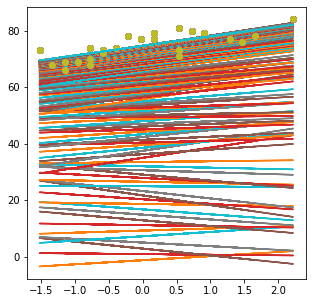

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# 세션에서 실행시켜야 훈련이 시작됩니다.
with tf.Session() as sess:

    # 변수 W와 b가 앞에서 지정한 값으로 초기화됩니다.
    sess.run(tf.global_variables_initializer())

    count = 0

    # celluloid.Camera On!
    camera = celluloid.Camera(fig)  

    # Fit all training data --> fiting은 모든 훈련 데이터에 맞도록 모델의 파라미터를 수정하는 과정입니다.
    for epoch in range(training_epochs):
        count += 1
        for (x, y) in zip(train_x, train_y):   # zip에 있는 리스트들을 원소로하는 튜플을 생성하여
            plt.plot(train_x, train_y, 'o')
            plt.plot(train_x, sess.run(W) * train_x + sess.run(b), )  # 최종 결정된 모델 파라미터를 직선으로 표현합니다.
            camera.snap()  # 스샷
            sess.run(optimizer, feed_dict={X: x, Y: y})  # 모델의 입력인 플레이스홀더 X, Y에 데이터로 제공합니다. 그래야 optimizer를 실행할 수 있습니다.
    
            

        #feed_dict -> 각각의 변수에 값들 넣어줌
        c = sess.run(cost, feed_dict={X: train_x, Y:train_y})
       #if count % 20 == 0:
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.3f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b),"count=", count)


    print("최적화가 완료되었습니다.")
    training_cost = sess.run(cost, feed_dict={X: train_x, Y: train_y})
    print("훈련이 끝난 후 비용과 모델 파라미터입니다.  cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    
   

In [23]:
# for loop이 종료되고나서 camera 인스턴스의 animate함수를 이용해서 이어붙이기
animation = camera.animate(interval=100, blit=True)

# jupyter에서 gif 보여주기
HTML(animation.to_html5_video())